<a href="https://colab.research.google.com/github/yvsim001/projekt/blob/main/Kopie_2_von_MeinMNIST_NETZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tflite==2.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.9 MB/s eta 0:00:00


In [4]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers

print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Model / data parameters
H, W, C = 28, 28, 1
IN_SHAPE = (H, W, C)
NB_CLASSES = 10

# Load the data and split it between train and test sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train = x_train.reshape(x_train.shape[0], H, W, C)
x_test = x_test.reshape(x_test.shape[0], H, W, C)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

x_train.dtype

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


dtype('uint8')

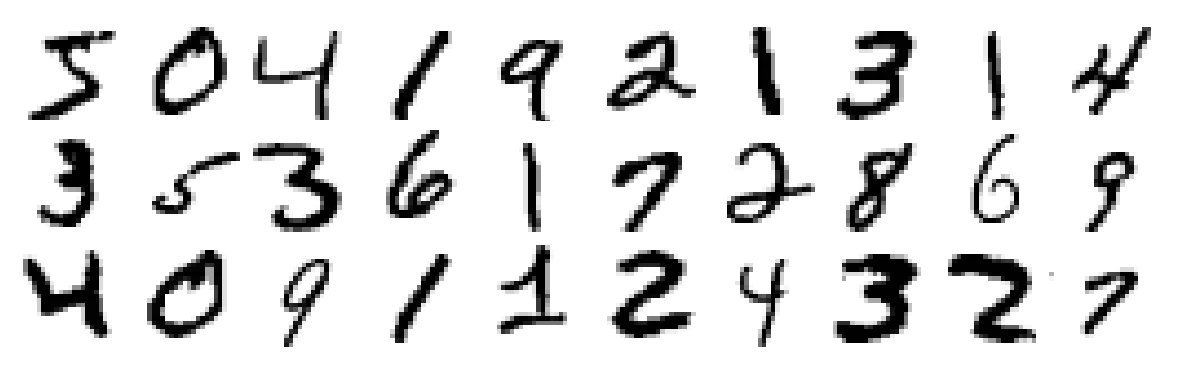

In [ ]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1
        )


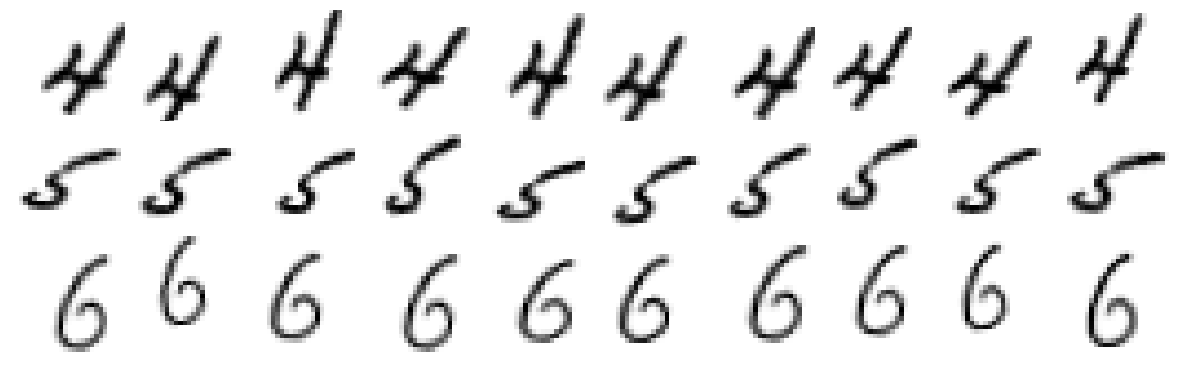

In [ ]:
# PREVIEW AUGMENTED IMAGES
X_train3 = x_train[9].reshape((1, 28, 28, 1))
Y_train3 = y_train[9].reshape((1, 10))
plt.figure(figsize=(15, 4.5))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    X_train2, Y_train2 = next(datagen.flow(X_train3, Y_train3))
    plt.imshow(X_train2[0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
    if i == 9: X_train3 = x_train[11].reshape((1, 28, 28, 1))
    if i == 19: X_train3 = x_train[18].reshape((1, 28, 28, 1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

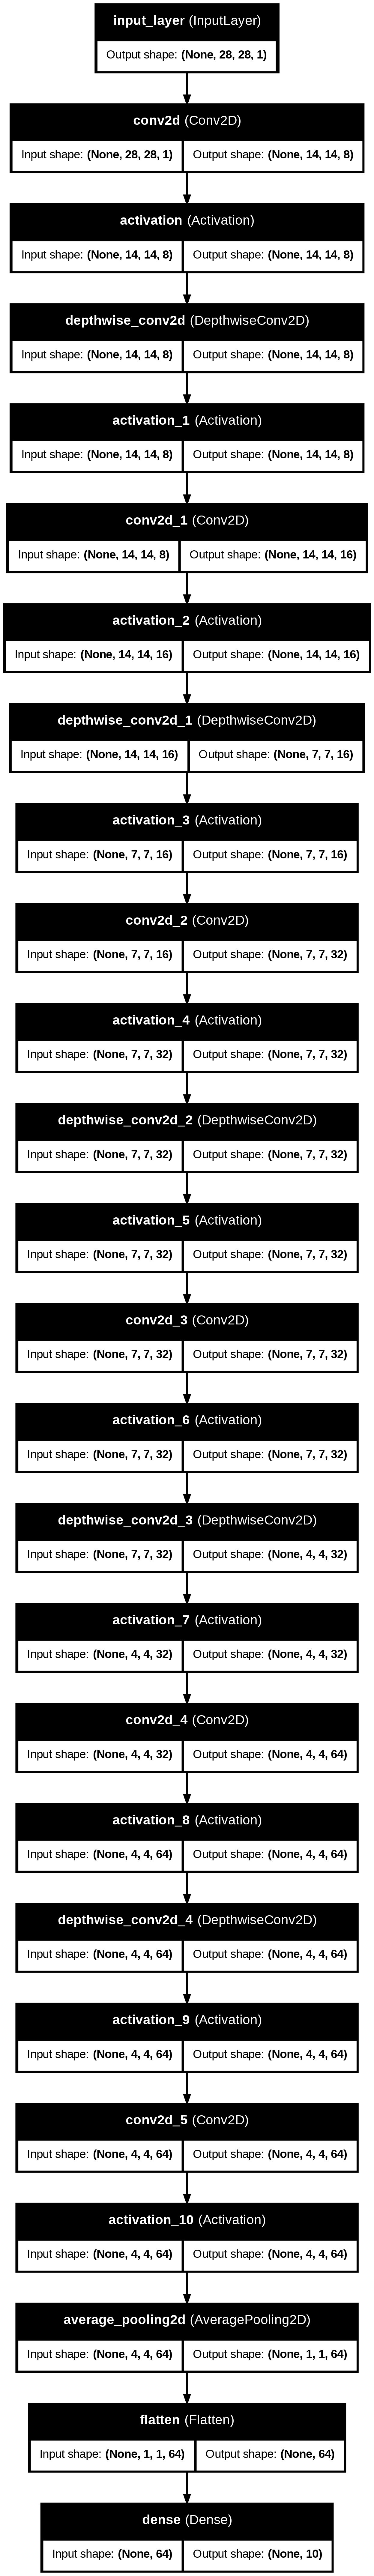

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
import numpy as np

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
IMAGE_SIZE = 28
BATCH_SIZE = 32
EPOCHS = 20

def meinMNIST():
    # Mobilenet parameters
    input_shape = [28,28,1] # resized to 28*28
    num_classes = 10
    num_filters = 8 # normally 32, but running with alpha=.25 per EEMBC requirement

    inputs = Input(shape=input_shape)
    x = inputs # Keras model uses ZeroPadding2D()

    # 1st layer, pure conv
    # Keras 2.2 model has padding='valid' and disables bias
    x = Conv2D(num_filters,
                  kernel_size=3,
                  strides=2,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(0.0001))(x)
    x = Activation('relu')(x) # Keras uses ReLU6 instead of pure ReLU

    # 2nd layer, depthwise separable conv
    # Filter size is always doubled before the pointwise conv
    # Keras uses ZeroPadding2D() and padding='valid'
    x = DepthwiseConv2D(kernel_size=3,
                  strides=1,
                  padding='same',
                  depthwise_initializer='he_normal',
                  depthwise_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    num_filters = 2*num_filters
    x = Conv2D(num_filters,
                  kernel_size=1,
                  strides=1,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    # 3rd layer, depthwise separable conv
    x = DepthwiseConv2D(kernel_size=3,
                  strides=2,
                  padding='same',
                  depthwise_initializer='he_normal',
                  depthwise_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    num_filters = 2*num_filters
    x = Conv2D(num_filters,
                  kernel_size=1,
                  strides=1,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    # 4th layer, depthwise separable conv
    x = DepthwiseConv2D(kernel_size=3,
                  strides=1,
                  padding='same',
                  depthwise_initializer='he_normal',
                  depthwise_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    x = Conv2D(num_filters,
                  kernel_size=1,
                  strides=1,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    # 5th layer, depthwise separable conv
    x = DepthwiseConv2D(kernel_size=3,
                  strides=2,
                  padding='same',
                  depthwise_initializer='he_normal',
                  depthwise_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    num_filters = 2*num_filters
    x = Conv2D(num_filters,
                  kernel_size=1,
                  strides=1,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)


    # 6th layer, depthwise separable conv
    x = DepthwiseConv2D(kernel_size=3,
                  strides=1,
                  padding='same',
                  depthwise_initializer='he_normal',
                  depthwise_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    x = Conv2D(num_filters,
                  kernel_size=1,
                  strides=1,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))(x)
    x = Activation('relu')(x)

    # Average pooling, max polling may be used also
    # Keras employs GlobalAveragePooling2D
    x = AveragePooling2D(pool_size=x.shape[1:3])(x)
    #x = MaxPooling2D(pool_size=x.shape[1:3])(x)

    # Keras inserts Dropout() and a pointwise Conv2D() here
    # We are staying with the paper base structure

    # Flatten, FC layer and classify
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = meinMNIST()

from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0]
epochs = 30

X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.1)


In [ ]:
# Ensure shapes are correct
print(X_train2.shape)  # Should be (54000, 28, 28, 1)
print(Y_train2.shape)  # Should be (54000, 10)
print(X_val2.shape)  # Should be (6000, 28, 28, 1)
print(Y_val2.shape)  # Should be (6000, 10)

(54000, 28, 28, 1)
(54000, 10)
(6000, 28, 28, 1)
(6000, 10)


In [ ]:
train_dataset= datagen.flow(
    X_train2,
    Y_train2,
    batch_size=64)

validation_dataset= datagen.flow(
    X_val2,
    Y_val2,
    batch_size=64)

for batch in train_dataset:
  print(batch[0].shape)
  break

for batch in validation_dataset:
  print(batch[0].shape)
  break

(64, 28, 28, 1)
(64, 28, 28, 1)


In [ ]:
early_stopping = EarlyStopping(patience=10)

In [ ]:
batch_size = 32
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6580 - loss: 1.0271 - val_accuracy: 0.9363 - val_loss: 0.2337
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9512 - loss: 0.1946 - val_accuracy: 0.9670 - val_loss: 0.1487
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1536 - val_accuracy: 0.9798 - val_loss: 0.1145
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9706 - loss: 0.1320 - val_accuracy: 0.9757 - val_loss: 0.1181
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9737 - loss: 0.1209 - val_accuracy: 0.9762 - val_loss: 0.1143
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9777 - loss: 0.1074 - val_accuracy: 0.9758 - val_loss: 0.1119
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9800 - loss: 0.1026 - val_accuracy: 0.9812 - val_loss: 0.0999
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9825 - loss: 0.0934

In [ ]:
 # Print training and validation accuracy
print("CNN: Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(
    epochs, max(history.history['accuracy']), max(history.history['val_accuracy'])
))

CNN: Epochs=15, Train accuracy=0.98722, Validation accuracy=0.98467


In [ ]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 14, 14, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 7, 7, 16)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 7, 7, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 32)            │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_3 (DepthwiseConv2D) │ (None, 4, 4, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_4 (DepthwiseConv2D) │ (None, 4, 4, 64)            │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 30,800 (120.32 KB)

 Trainable params: 10,266 (40.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,534 (80.21 KB)

Test loss: 0.09176970273256302
Test accuracy: 0.982699990272522


In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['loss'],
                    mode='lines+markers',
                    name='Training loss'))
fig.add_trace(go.Scatter(y = history.history['val_loss'],
                    mode='lines+markers',
                    name='Validation loss'))

fig.update_layout(title_text = 'Loss of model')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['accuracy'],
                    mode='lines+markers',
                    name='Training accuracy'))
fig.add_trace(go.Scatter(y = history.history['val_accuracy'],
                    mode='lines+markers',
                    name='Validation accuracy'))

fig.update_layout(title_text = 'Accuracy of model')
fig.show()

In [ ]:
classes = {"0","1","2","3","4","5","6","7","8","9"}
test_dataset= datagen.flow(
    x_test,
    y_test,
    batch_size=64)

for batch in test_dataset:
  print(batch[0].shape)
  break

(64, 28, 28, 1)


In [ ]:
test_generator=test_dataset
predict = model.predict(test_generator, steps=int(np.ceil(x_test.shape[0] / 64)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


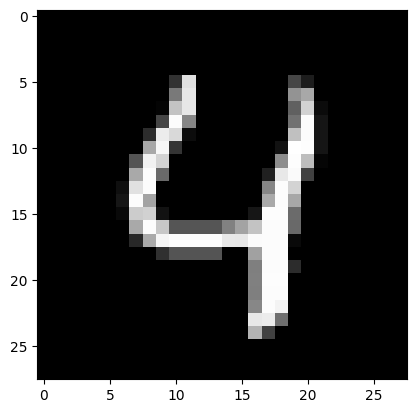

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 100.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%


In [ ]:
import matplotlib.pyplot as plt
test_images = x_test
# For example, if test_images[4] is a single image with shape (28, 28, 1)
img = test_images[4]

# Display the image
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")

In [ ]:
model.save('/content/drive/MyDrive/trained_models/mnist_fp32.h5')

In [ ]:
# test the model
_, acc = model.evaluate(x_test, y_test, verbose=0)

print("acc = {:.2f}".format(acc))

acc = 0.98


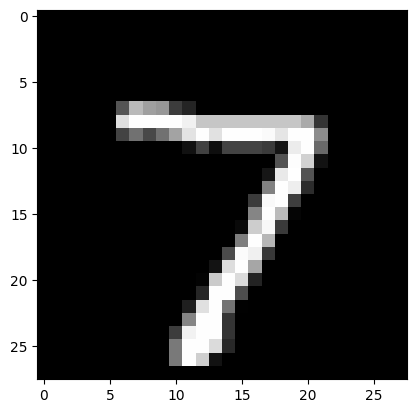

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 99.99%
Class 8: 0.00%
Class 9: 0.01%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image from the specified path and resize it to 28x28
# Convert the image to an array
img_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,205,248,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,254,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,251,240,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,221,254,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,203,254,219,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,254,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,224,254,115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,254,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,242,254,254,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,254,219,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,207,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
img_array = np.array(img_array)

# Reshaping the array into 28x28x1
img_array= np.array(img_array).reshape(28, 28, 1)
# Display the resized image

plt.imshow(img_array.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img_array, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")

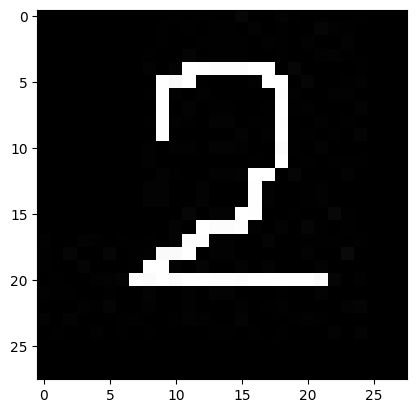

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions (in percentages) for each class:
Class 0: 0.00%
Class 1: 0.02%
Class 2: 99.83%
Class 3: 0.09%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.04%
Class 8: 0.01%
Class 9: 0.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image from the specified path and resize it to 28x28
img_path = "/content/drive/MyDrive/RANDOM_IMAGE_FOR_TEST/Nummer_2.jpg"
img = load_img(img_path, color_mode='grayscale', target_size=(28, 28))

# Convert the image to an array
img_array = 255 - img_to_array(img) #invert the color


# Display the resized image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.show()

# Reshape the image to match the model's input requirements (1, 28, 28, 1)
img_reshaped = np.expand_dims(img_array, axis=0)

# Predict using the reshaped image
prediction = model.predict(img_reshaped)

# Print the prediction
print("Predictions (in percentages) for each class:")
for idx, prob in enumerate(prediction[0]):
    print(f"Class {idx}: {prob*100:.2f}%")

In [ ]:
def tflite_convert_to_int8(model, data, type_io=None):
    print("Quantize the model (post-quantization) io_type={}".format(type_io), flush=True)

    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Convert the data to FLOAT32
    mnist_sampleset = tf.data.Dataset.from_tensor_slices(data.astype(np.float32)).batch(1)

    def rep_data_gen():
        for input_value in mnist_sampleset.take(100):
          yield [input_value]

    converter.representative_dataset = rep_data_gen
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]


    converter.target_spec.supported_types = [tf.int8]
    # These set the input and output tensors to uint8 (added in r2.3)
    converter.inference_input_type = tf.uint8  # or tf.int8/tf.float32
    converter.inference_output_type = tf.uint8  # or tf.int8/tf.float32

    return converter.convert()

In [ ]:
# post-quantize the model
tf_q = tflite_convert_to_int8(model, x_train)

print("Saving the model : ", "/content/drive/MyDrive/trained_models/meinMNIST_V1.1.tflite")
with open("/content/drive/MyDrive/trained_models/meinMNIST_V1.1.tflite", "wb") as f:
    f.write(tf_q)

Quantize the model (post-quantization) io_type=None
Saved artifact at '/tmp/tmp6wjmumd1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139945171745104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945211277232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170112528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170116048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170115168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170119040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170118336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170122736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170122032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139945170123792: TensorSpec(shape

In [9]:
# Load the quantized TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/trained_models/meinMNIST_V1.1.tflite")


input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# Adjust the model interpreter to take 10,000 inputs at once instead of just 1
interpreter.resize_tensor_input(input_details[0]["index"], (10000, 28,28,1))
interpreter.resize_tensor_input(output_details[0]["index"], (10000, 10))

interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()



# Set the test input and run
interpreter.set_tensor(input_details[0]["index"], x_test) # Cast x_test to float32
interpreter.invoke()

# Get the result and check its accuracy
output_data = (interpreter.get_tensor(output_details[0]["index"]))
y_test = y_test.astype(np.uint8)

predicted_classes = [np.argmax(y, axis=None, out=None) for y in output_data]
true_classes = [np.argmax(y, axis=None, out=None) for y in y_test]

accuracy = (np.array(predicted_classes) == np.array(true_classes)).mean()
print("TFLite Accuracy:", accuracy)

TFLite Accuracy: 0.9828


In [10]:
print(y_test[0:10])
print(y_test.dtype)

[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
uint8


In [11]:
print(output_data[0:10])

[[  0   0   0   0   0   0   0 255   0   0]
 [  0   0 255   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   2   1   0   0   0   0 252]
 [  0   0   0   0   0 235  21   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255]]


In [12]:
print(predicted_classes[0:100])
print(true_classes[0:100])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]


In [13]:
meinModel= tf.keras.models.load_model('/content/drive/MyDrive/trained_models/mnist_fp32.h5')

In [1]:
def print_zeropoints_und_scaled(interpreter):
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  print("Input scale, zero_point = {}, {}".format(input_details[0]['quantization'][0], input_details[0]['quantization'][1]))
  print("Output scale, zero_point = {}, {}".format(output_details[0]['quantization'][0], output_details[0]['quantization'][1]))

def print_all_tensor_details(interpreter):
  tensor_details = interpreter.get_tensor_details()
  for tensor in tensor_details:
    print(tensor)


In [14]:
print_zeropoints_und_scaled(interpreter)

Input scale, zero_point = 1.0, 0
Output scale, zero_point = 0.00390625, 0


In [15]:
print_all_tensor_details(interpreter)

{'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([10000,    28,    28,     1], dtype=int32), 'shape_signature': array([-1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (1.0, 0), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'arith.constant', 'index': 1, 'shape': array([2], dtype=int32), 'shape_signature': array([2], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
{'name': 'tfl.pseudo_qconst', 'index': 2, 'shape': array([10], dtype=int32), 'shape_signature': array([10], dtype=int32), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([0.00246879, 0.0015815 , 0.00232694, 0.00166271, 0.0017

In [ ]:
!pip install tvm --pre

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
  Created wheel for tvm: filename=tvm-1.0.0-py3-none-any.whl size=5084 sha256=943d183a12bf43772038c72f63fb824cbe1e084fe0a98de82379d193d590eb19
  Stored in directory: /root/.cache/pip/wheels/9e/31/8c/025d5271ffd5a09fa26522edb4cdbb3d532c2f254a3bbb7c40
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=490fcc33b9d60c173dc7751352be5be0914669787ccc350408b23d0582988922
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built tvm docopt


In [ ]:
!pip install apache-tvm --pre

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 10.9 MB/s eta 0:00:00


In [ ]:
!pip install tflite --pre

In [ ]:
import os
import numpy as np
import pathlib
import json
from PIL import Image
import tarfile

import tvm
from tvm import relay
from tvm.relay.backend import Executor, Runtime
from tvm.contrib.download import download_testdata
from tvm.micro import export_model_library_format
from tvm.relay.op.contrib import cmsisnn
from tvm.micro.testing.utils import create_header_file

In [ ]:
MODEL_URL = "/content/drive/MyDrive/trained_models/mnist_model_quant.tflite"
MODEL_NAME = "meinMNIST_V1.1.tflite"
MODEL_PATH = MODEL_URL

tflite_model_buf = open(MODEL_PATH, "rb").read()
try:
    import tflite

    tflite_model = tflite.Model.GetRootAsModel(tflite_model_buf, 0)
except AttributeError:
    import tflite.Model

    tflite_model = tflite.Model.Model.GetRootAsModel(tflite_model_buf, 0)



# TFLite input tensor name, shape and type
input_tensor = "input"
input_shape = (1,28, 28, 1)
input_dtype = "uint8"

# Parse TFLite model and convert it to a Relay module
from tvm import relay, transform

mod, params = relay.frontend.from_tflite(
    tflite_model, shape_dict={input_tensor: input_shape}, dtype_dict={input_tensor: input_dtype}
)

# Print the Relay module to inspect the weights
print(mod)

# Check the type and shape of the weight tensors
for name, param in params.items():
    print(f"Name: {name}, Type: {type(param)}, Shape: {param.shape}")

def @main(%input_1: Tensor[(1, 28, 28, 1), uint8] /* span=input_1:0:0 */, %v_param_1: Tensor[(3, 3, 1, 12), int8] /* span=sequential/conv2d/Conv2D:0:0 */, %v_param_2: Tensor[(12), int32] /* span=sequential/conv2d/BiasAdd;sequential/conv2d/Conv2D;sequential/conv2d/BiasAdd/ReadVariableOp/resource:0:0 */, %v_param_3: Tensor[(3, 3, 12, 32), int8] /* span=sequential/conv2d_1/Conv2D:0:0 */, %v_param_4: Tensor[(32), int32] /* span=sequential/conv2d_1/BiasAdd;sequential/conv2d_1/Conv2D;sequential/conv2d_1/BiasAdd/ReadVariableOp/resource:0:0 */, %v_param_5: Tensor[(3, 3, 32, 64), int8] /* span=sequential/conv2d_2/Conv2D:0:0 */, %v_param_6: Tensor[(64), int32] /* span=sequential/conv2d_2/BiasAdd;sequential/conv2d_2/Conv2D;sequential/conv2d_2/BiasAdd/ReadVariableOp/resource:0:0 */, %v_param_7: Tensor[(10, 64), int8] /* span=sequential/dense/MatMul:0:0 */, %v_param_8: Tensor[(10), int32] /* span=sequential/dense/BiasAdd/ReadVariableOp/resource:0:0 */, output_tensor_names=["Identity"]) {
  %0 = qnn

In [ ]:
# We can use TVM native schedules or rely on the CMSIS-NN kernels using TVM Bring-Your-Own-Code (BYOC) capability.
USE_CMSIS_NN = True

# USMP (Unified Static Memory Planning) performs memory planning of all tensors holistically to achieve best memory utilization
DISABLE_USMP = False

# Use the C runtime (crt)
RUNTIME = Runtime("crt")

# We define the target by passing the board name to `tvm.target.target.micro`.
# If your board is not included in the supported models, you can define the target such as:
#TARGET = tvm.target.Target("c -keys=arm_cpu,cpu -mcpu=cortex-m4")
TARGET = tvm.target.target.micro("stm32l4r5zi")

# Use the AOT executor rather than graph or vm executors. Use unpacked API and C calling style.
EXECUTOR = tvm.relay.backend.Executor(
    "aot", {"unpacked-api": True, "interface-api": "c", "workspace-byte-alignment": 8}
)

# Now, we set the compilation configurations and compile the model for the target:
config = {"tir.disable_vectorize": True}
#if USE_CMSIS_NN:
#    config["relay.ext.cmsisnn.options"] = {"mcpu": TARGET.mcpu}
#if DISABLE_USMP:
#    config["tir.usmp.enable"] = False

with tvm.transform.PassContext(opt_level=3, config=config):
    if USE_CMSIS_NN:
        # When we are using CMSIS-NN, TVM searches for patterns in the
        # relay graph that it can offload to the CMSIS-NN kernels.
        mod = cmsisnn.partition_for_cmsisnn(mod, params, mcpu=TARGET.mcpu)
        lowered = tvm.relay.build(
        mod, target=TARGET, params=params, runtime=RUNTIME, executor=EXECUTOR
    )
parameter_size = len(tvm.runtime.save_param_dict(lowered.get_params()))
print(f"Model parameter size: {parameter_size}")

# We need to pick a directory where our file will be saved.
# If running on Google Colab, we'll save everything in ``/root/tutorial`` (aka ``~/tutorial``)
# but you'll probably want to store it elsewhere if running locally.

BUILD_DIR = pathlib.Path("/content/drive/MyDrive/Rar_files")

BUILD_DIR.mkdir(exist_ok=True)

# Now, we export the model into a tar file:
TAR_PATH = pathlib.Path(BUILD_DIR) / "model_meinMNIST.tar"
export_model_library_format(lowered, TAR_PATH)

Model parameter size: 32


PosixPath('/content/drive/MyDrive/Rar_files/model_meinMNIST.tar')